In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
from dataset import ASODataset
from graph_fn import onehot_reactant_batch
from trainer import Trainer
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ExponentialLR
import torch
import numpy as np 
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader
from models import *

In [3]:
#hyperparameters
LEARNING_RATE = [1e-3,7.5e-3]
BATCH_SIZE = 16
NODE_INPUT_SIZE = 14
OUTPUT_SIZE_BEFORE_POOL = 30
NODE_HIDDEN_SIZE = 60
GLOB_VEC_SIZE = 10
EPOCHS = 50
DROP_OUT = [0,0.1,0.5]
BOND_ATTR = 5
NUM_LAYERS = [2,5]

In [4]:
a = ASODataset(onehot_reactant_batch)
train_data, val_data = train_test_split(a.data, test_size = 0.1, random_state = 42)
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

c:\Users\64392\Desktop\182\project\cs182project-master\runs\..\ASOhelpers.py:74: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  edge_attr = torch.tensor(edge_attr, dtype=torch.float)


Run 1
lr=0.001,drop=0,num_layer=2
Epoch: 010, Train Loss: 0.4733, Test Loss: 0.5766, Train MAE: 0.1002, Test MAE: 0.1282, , Train R2: 0.2509, Test R2: 0.0495
Epoch: 020, Train Loss: 0.4634, Test Loss: 0.5714, Train MAE: 0.0804, Test MAE: 0.1159, , Train R2: 0.3838, Test R2: 0.1389
Epoch: 030, Train Loss: 0.4490, Test Loss: 0.5337, Train MAE: 0.0678, Test MAE: 0.0775, , Train R2: 0.5972, Test R2: 0.6279
Epoch: 040, Train Loss: 0.4413, Test Loss: 0.5268, Train MAE: 0.0602, Test MAE: 0.0610, , Train R2: 0.7071, Test R2: 0.7377
Epoch: 050, Train Loss: 0.4352, Test Loss: 0.5355, Train MAE: 0.0489, Test MAE: 0.0826, , Train R2: 0.8074, Test R2: 0.6054
Run 2
lr=0.001,drop=0,num_layer=2
Epoch: 010, Train Loss: 0.5089, Test Loss: 0.5014, Train MAE: 0.1251, Test MAE: 0.1223, , Train R2: 0.0947, Test R2: 0.0771
Epoch: 020, Train Loss: 0.4980, Test Loss: 0.4919, Train MAE: 0.1075, Test MAE: 0.1047, , Train R2: 0.2378, Test R2: 0.2097
Epoch: 030, Train Loss: 0.4710, Test Loss: 0.4793, Train MAE: 0.

c:\Users\64392\Desktop\182\project\cs182project-master\runs\..\trainer.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Epoch: 050, Train Loss: 0.4509, Test Loss: 0.4611, Train MAE: 0.0426, Test MAE: 0.0457, , Train R2: 0.8494, Test R2: 0.8370
Run 3
lr=0.001,drop=0.1,num_layer=5
Epoch: 010, Train Loss: 0.4629, Test Loss: 0.4950, Train MAE: 0.0743, Test MAE: 0.0829, , Train R2: 0.6348, Test R2: 0.5500
Epoch: 020, Train Loss: 0.4483, Test Loss: 0.4903, Train MAE: 0.0470, Test MAE: 0.0712, , Train R2: 0.8196, Test R2: 0.6552
Epoch: 030, Train Loss: 0.4457, Test Loss: 0.4969, Train MAE: 0.0439, Test MAE: 0.0779, , Train R2: 0.8527, Test R2: 0.6136
Epoch: 040, Train Loss: 0.4448, Test Loss: 0.4949, Train MAE: 0.0414, Test MAE: 0.0754, , Train R2: 0.8658, Test R2: 0.6327
Epoch: 050, Train Loss: 0.4480, Test Loss: 0.4813, Train MAE: 0.0494, Test MAE: 0.0542, , Train R2: 0.8398, Test R2: 0.7859
Run 1
lr=0.001,drop=0.5,num_layer=2
Epoch: 010, Train Loss: 0.4815, Test Loss: 0.5610, Train MAE: 0.1077, Test MAE: 0.1367, , Train R2: 0.2339, Test R2: 0.0339
Epoch: 020, Train Loss: 0.4685, Test Loss: 0.5647, Train MAE

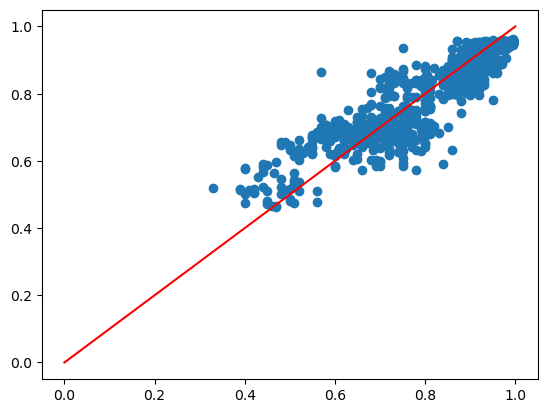

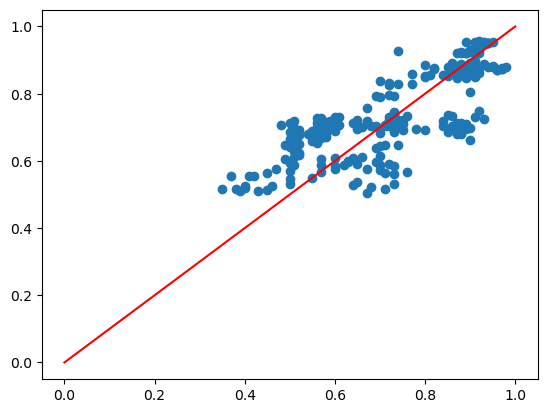

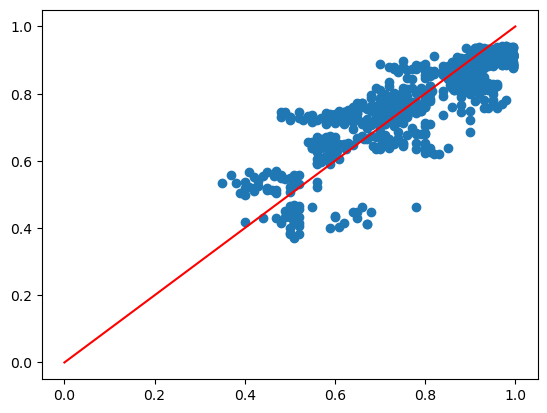

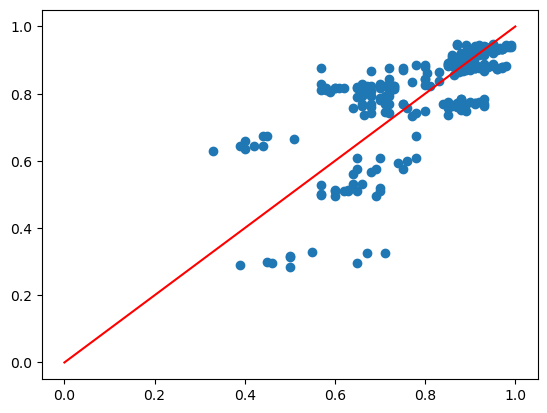

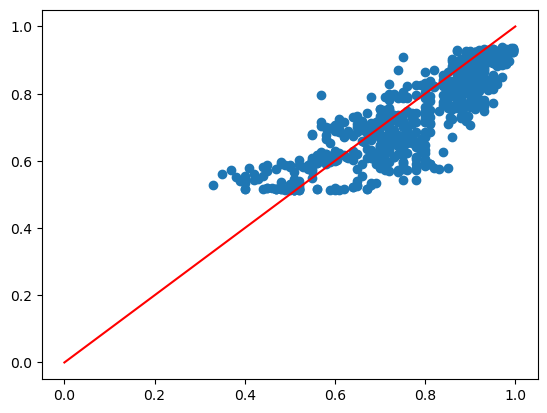

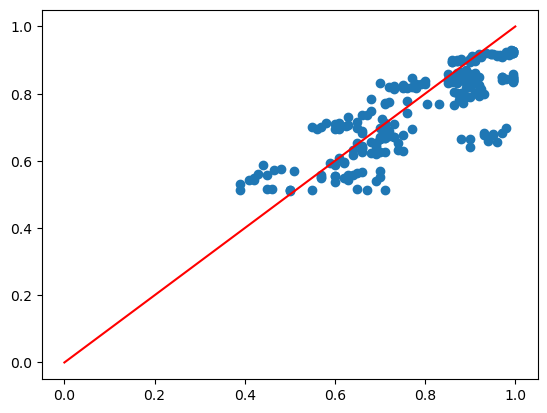

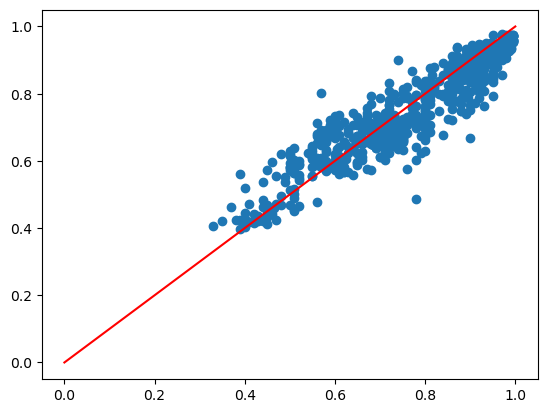

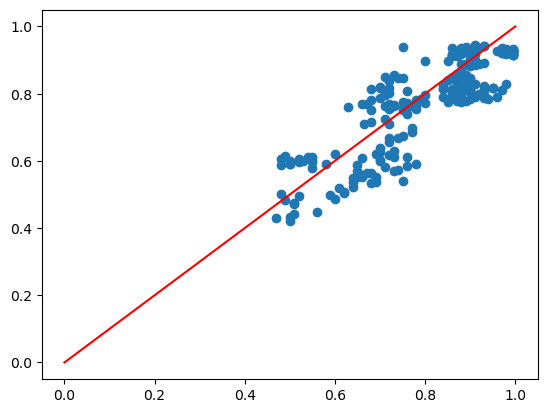

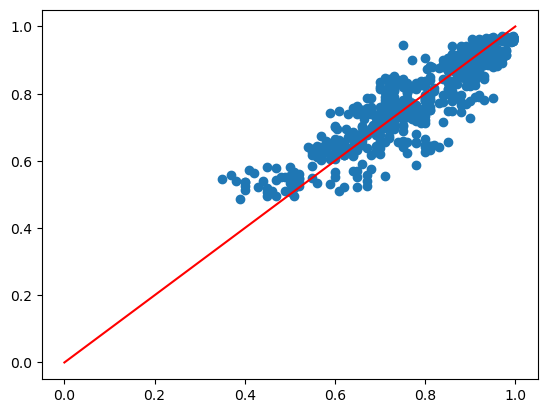

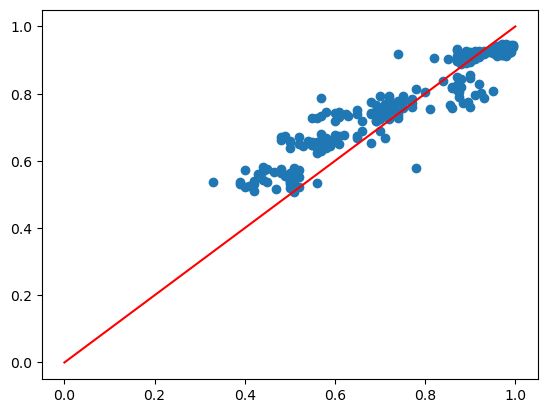

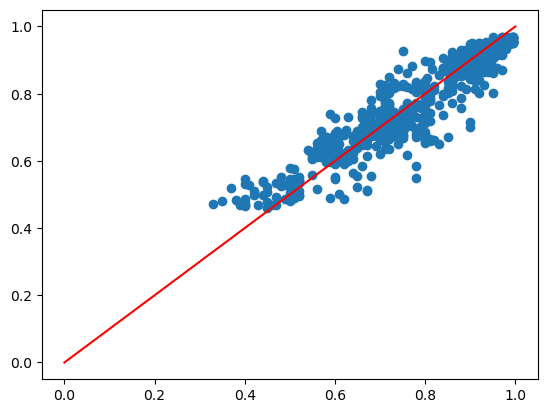

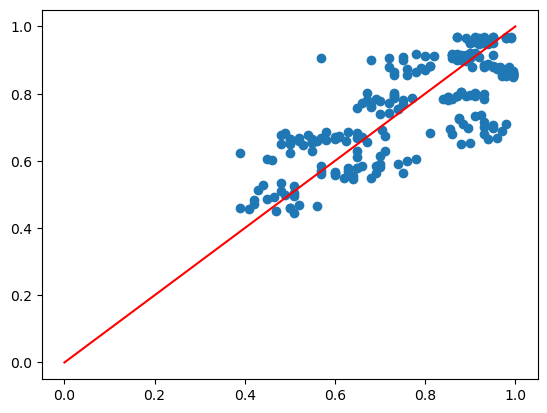

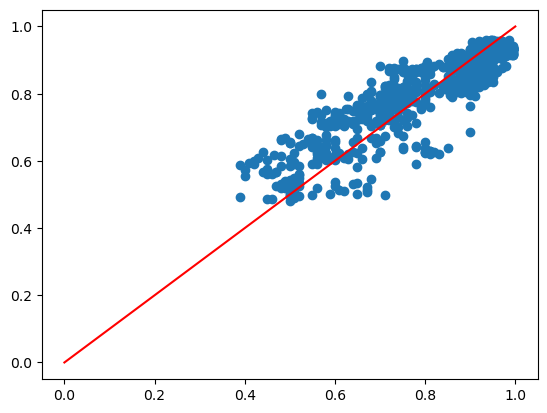

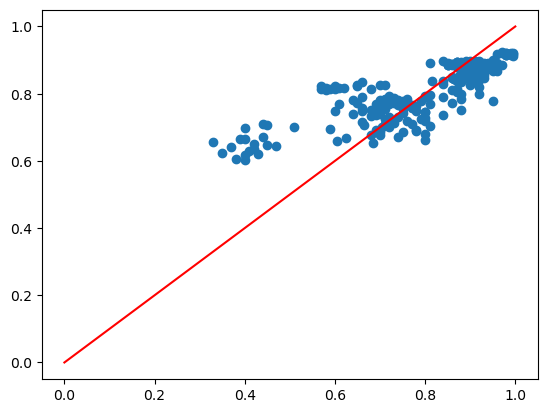

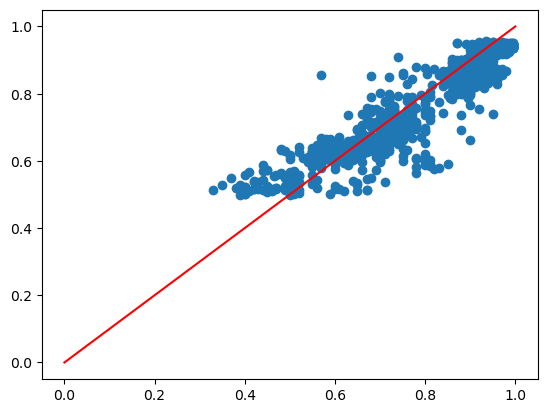

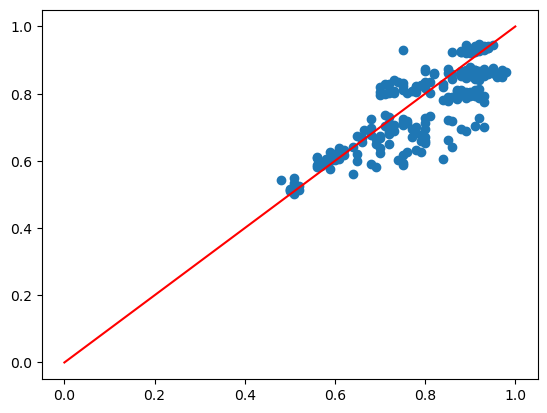

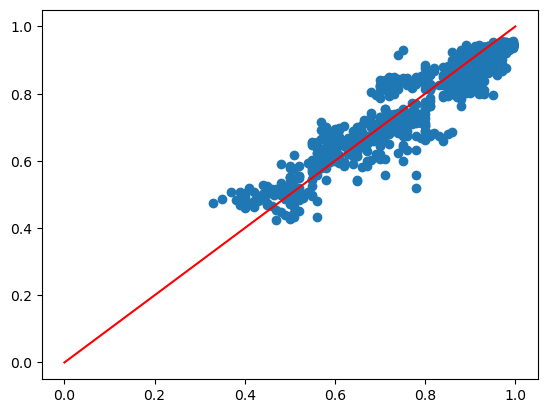

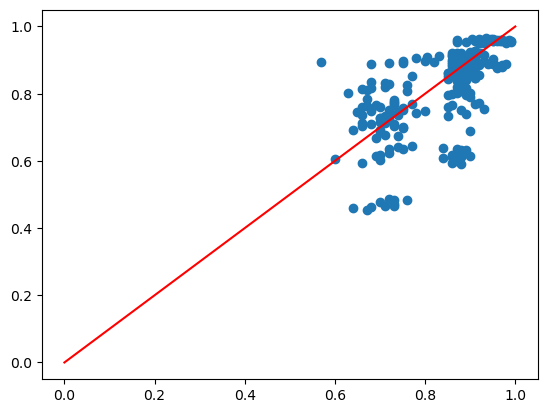

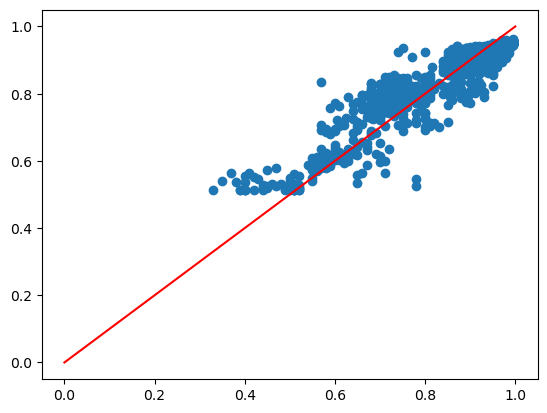

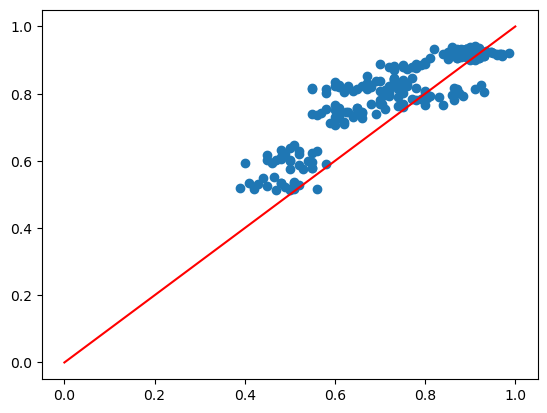

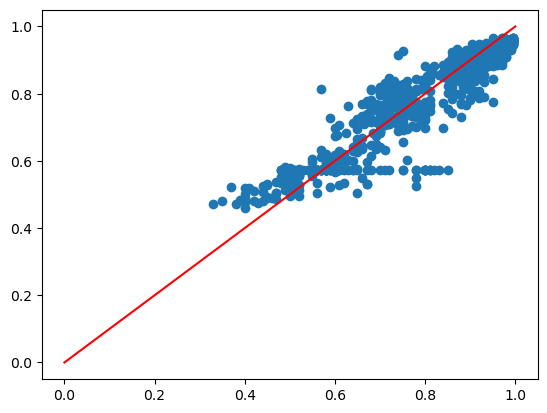

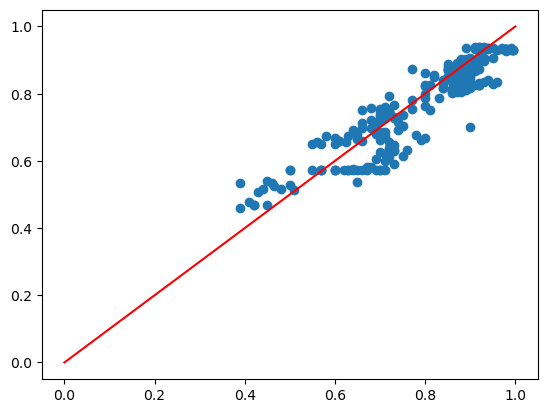

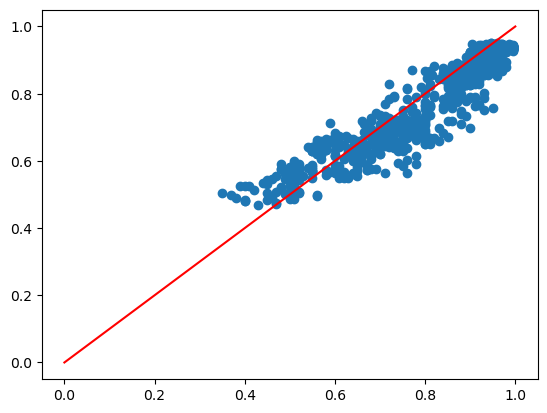

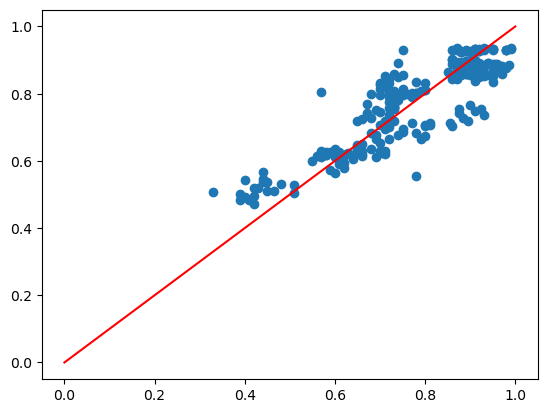

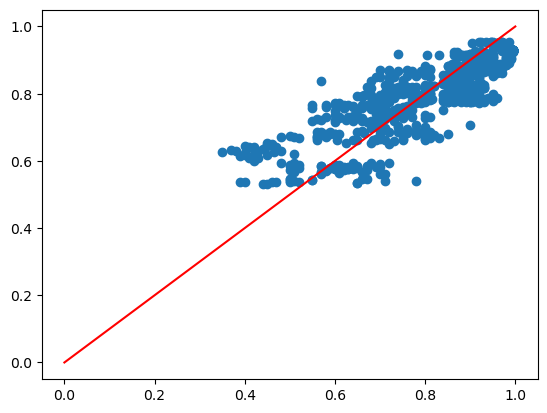

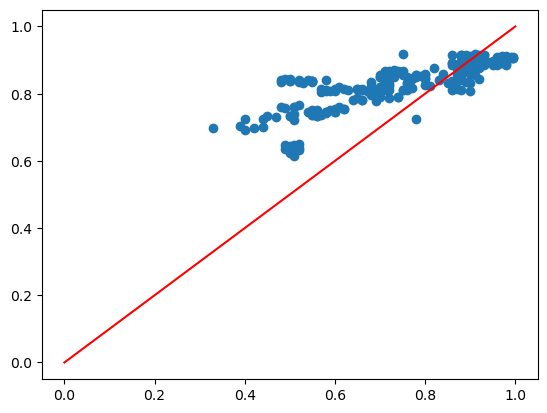

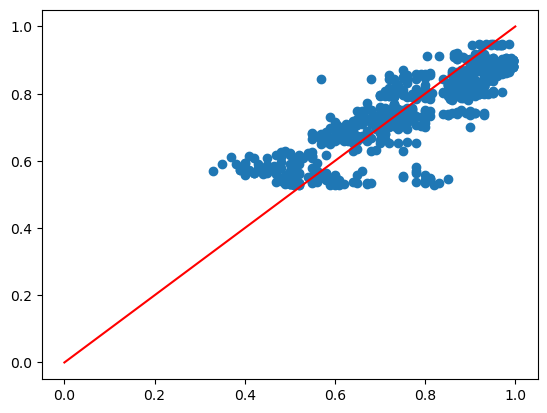

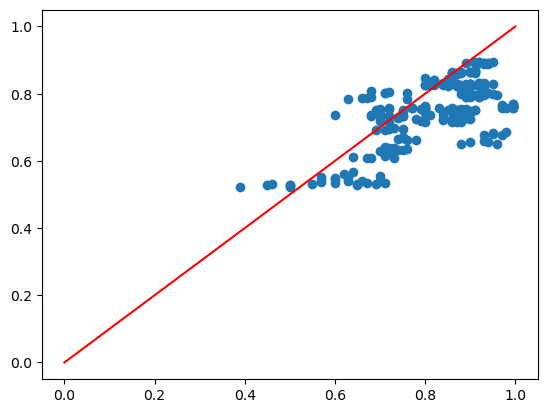

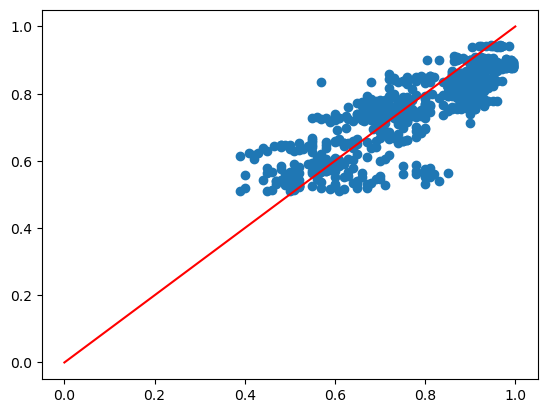

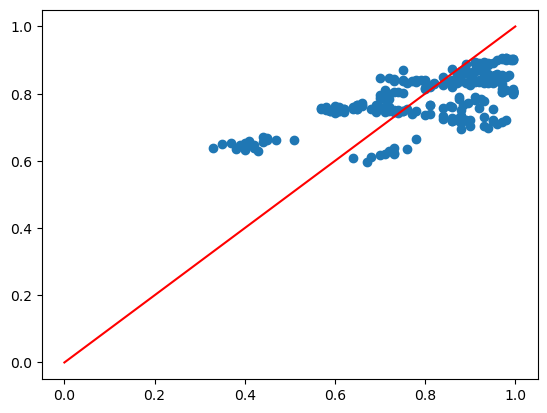

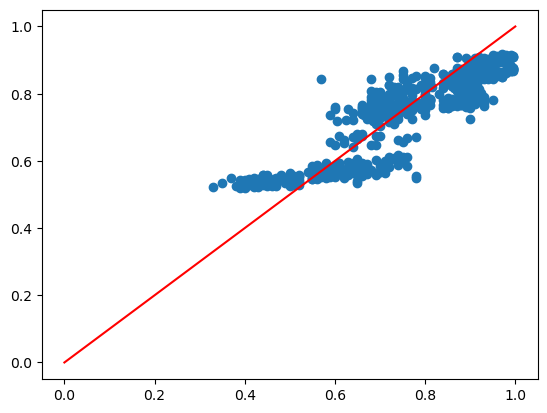

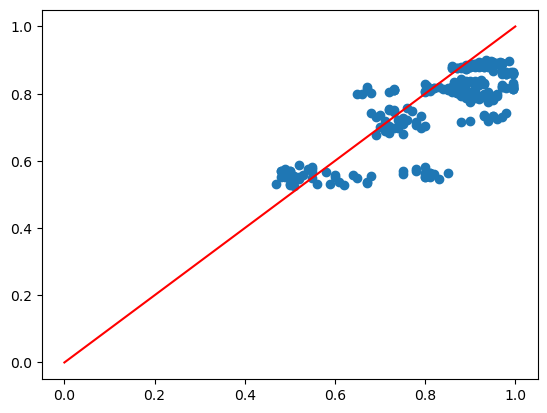

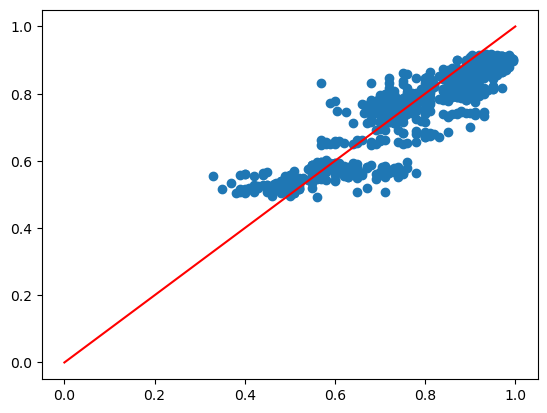

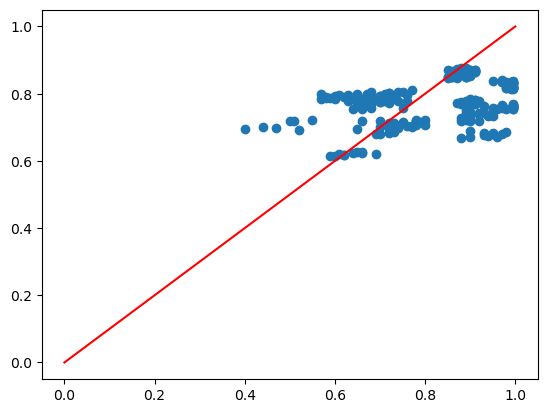

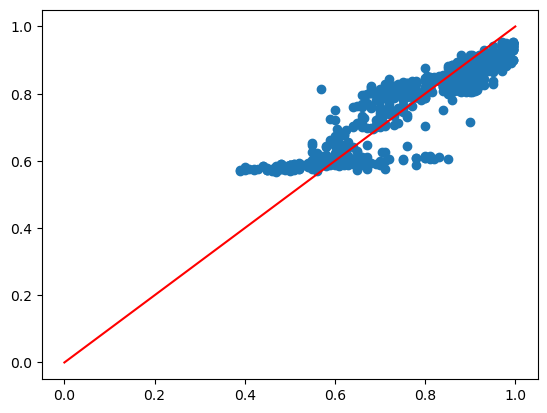

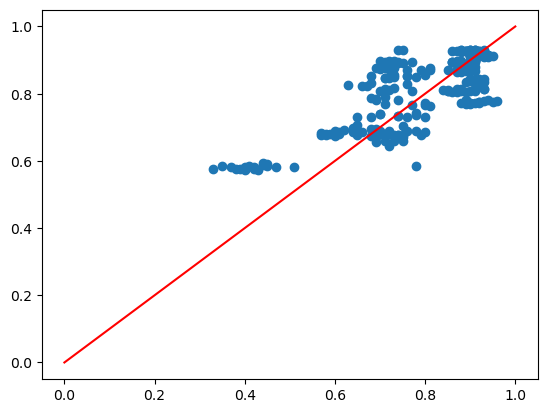

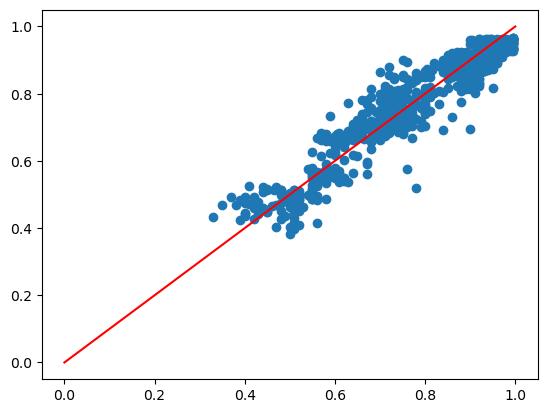

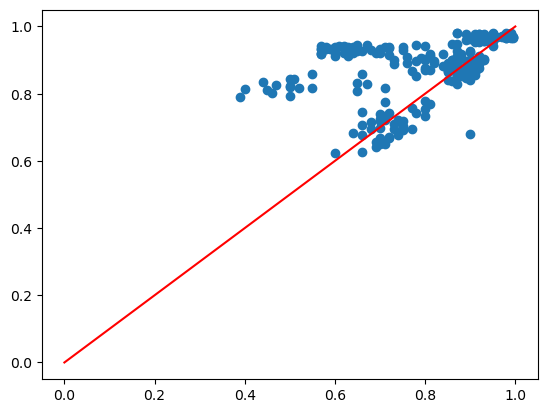

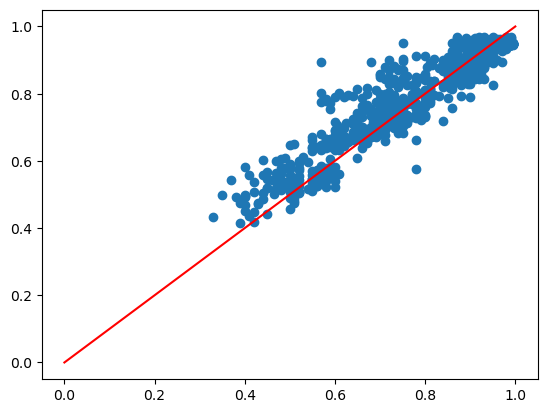

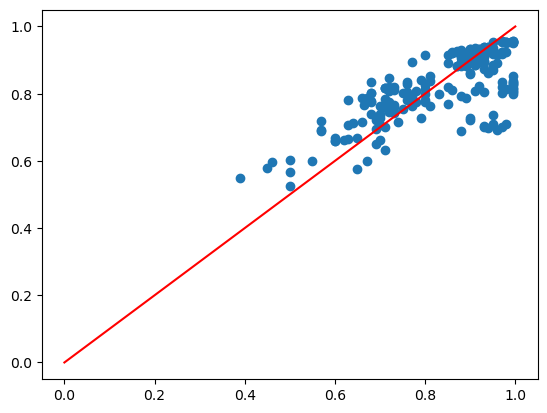

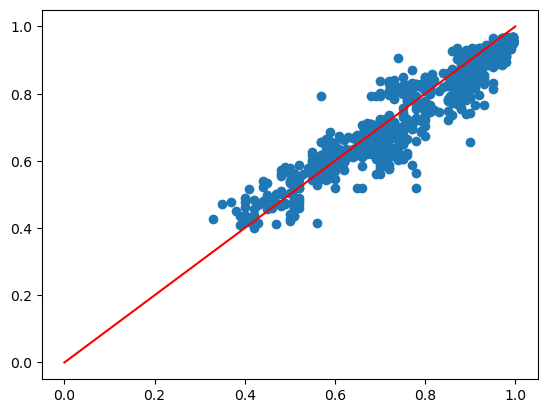

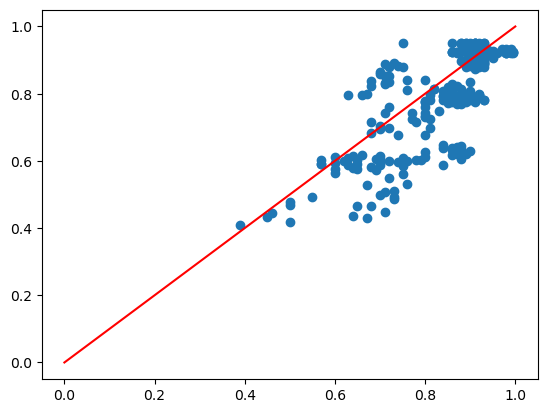

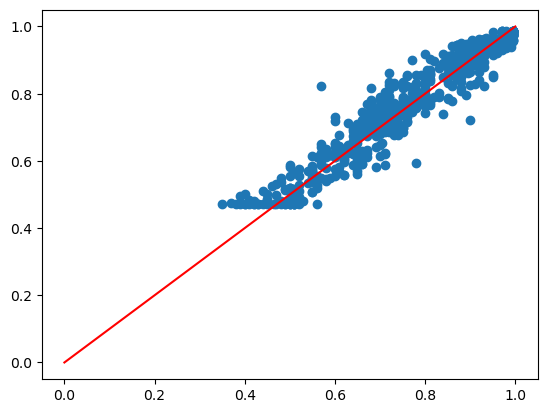

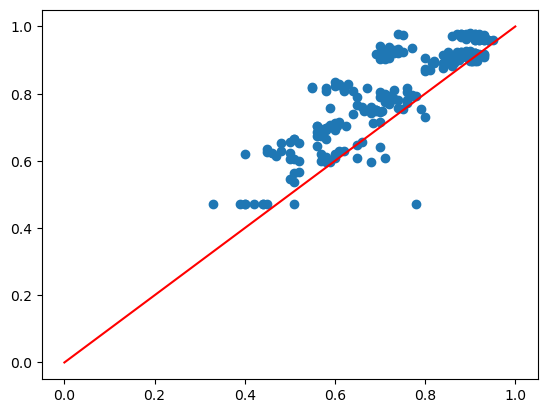

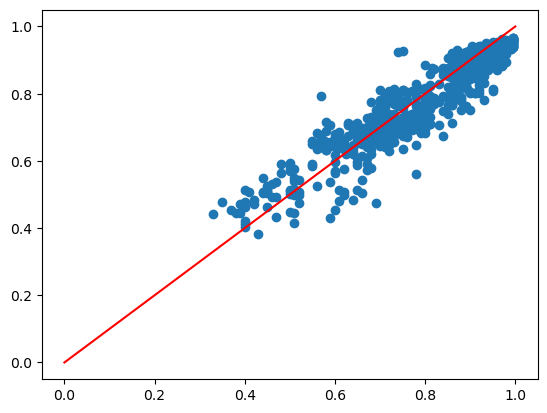

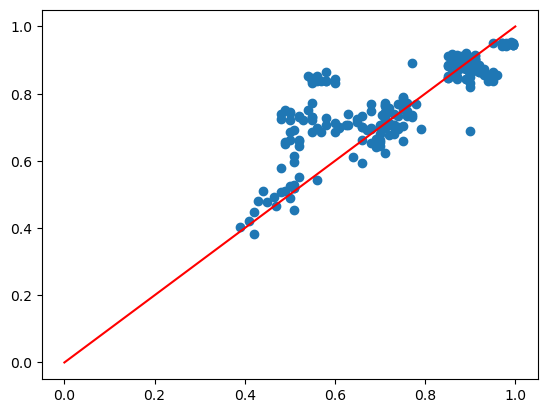

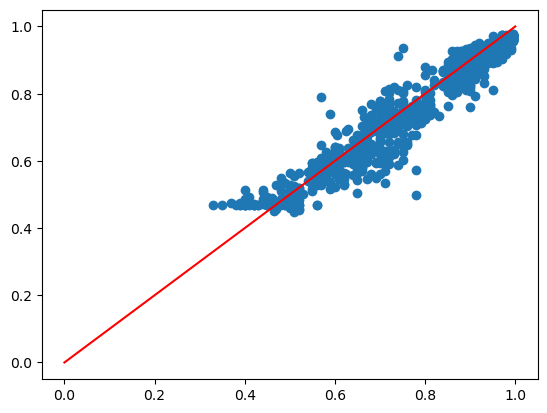

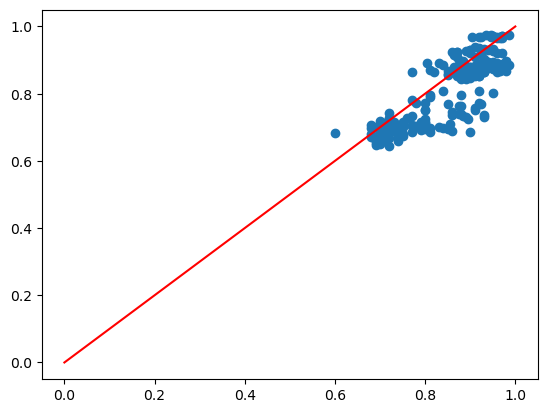

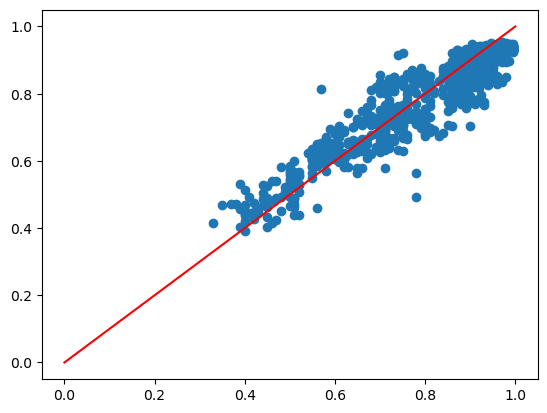

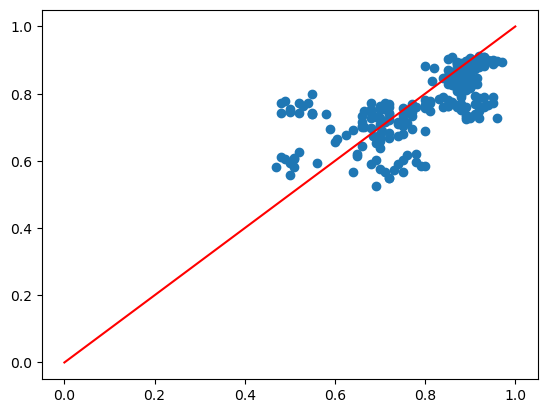

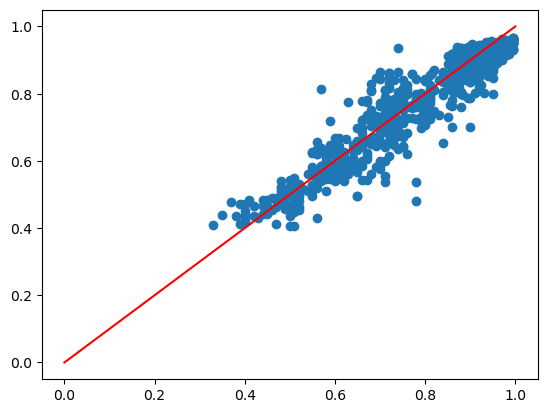

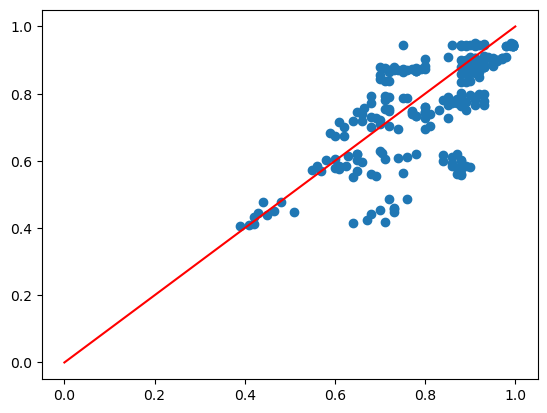

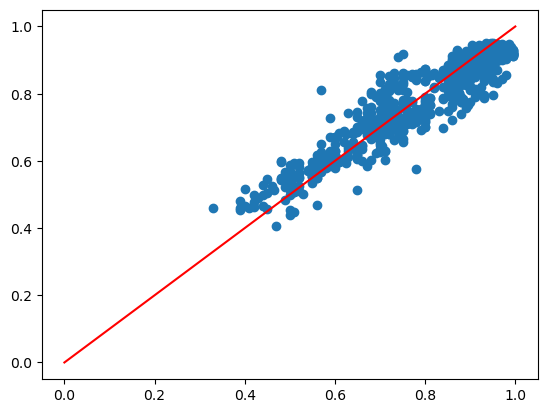

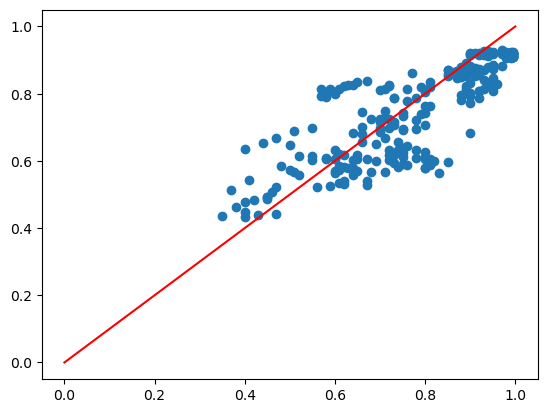

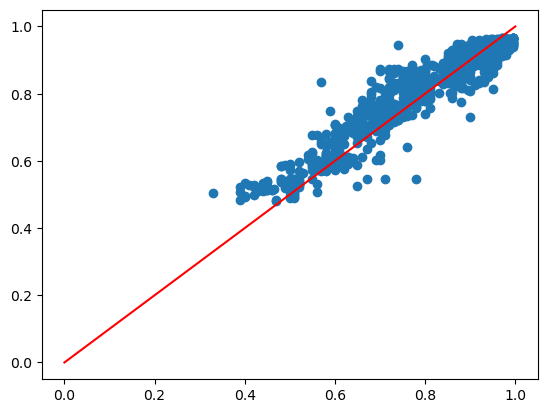

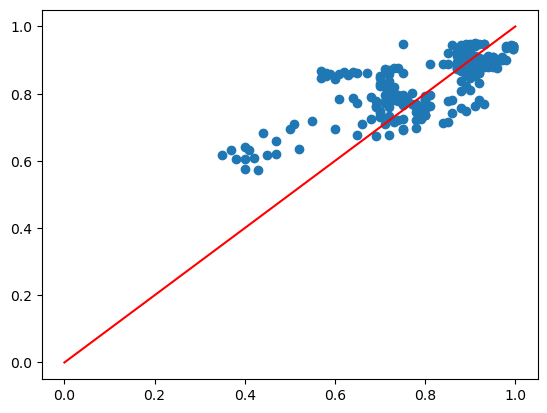

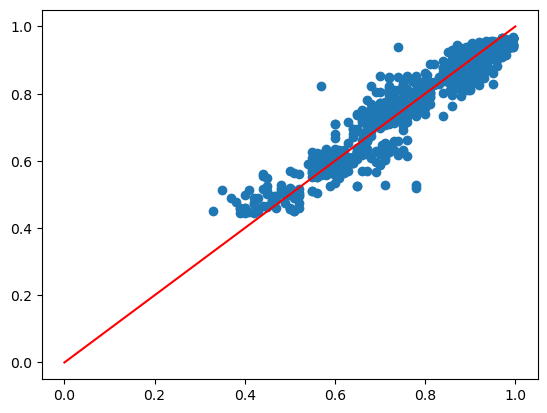

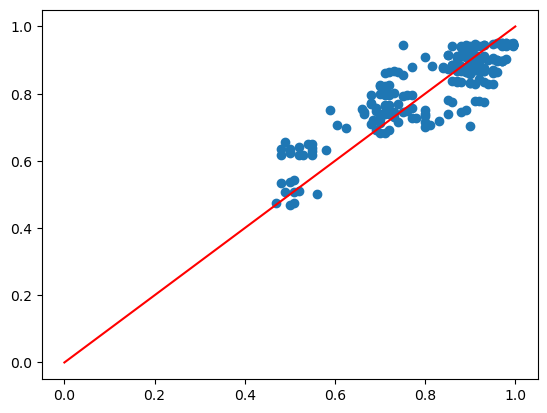

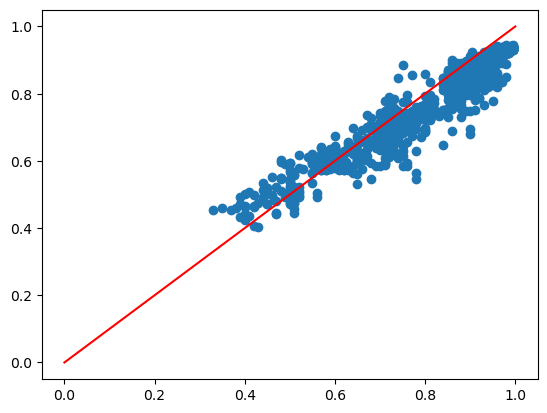

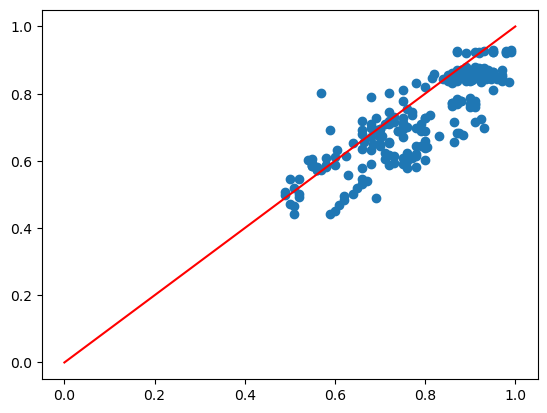

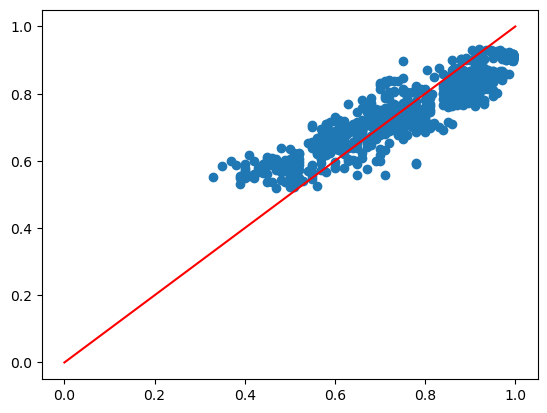

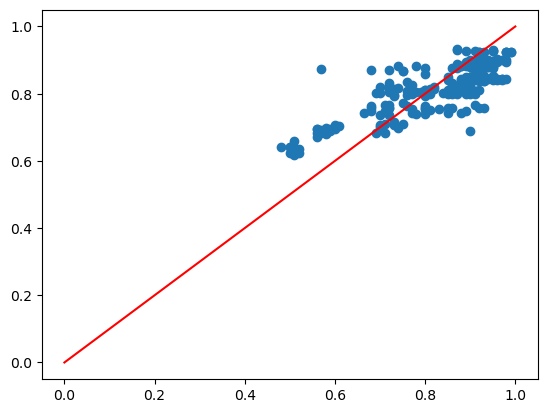

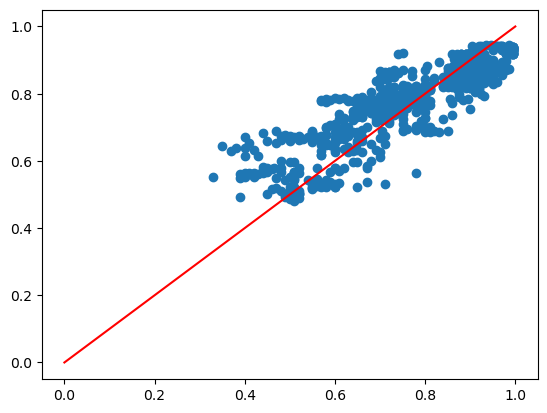

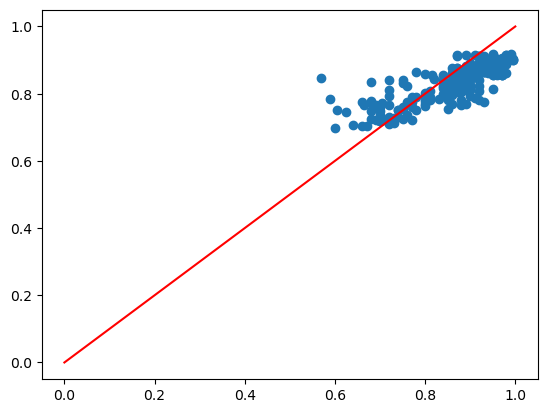

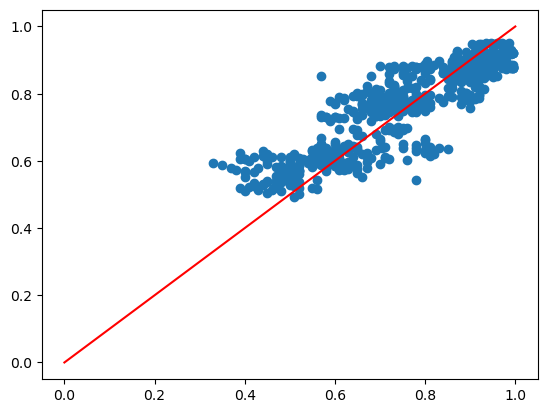

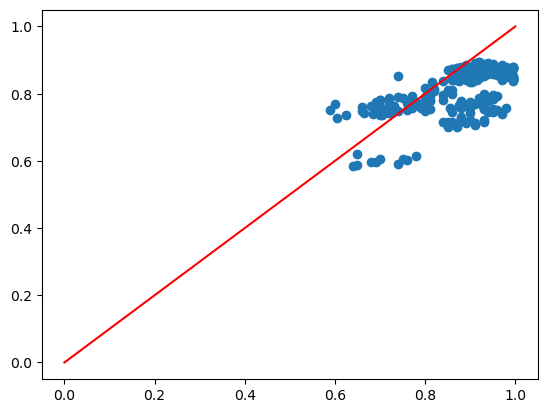

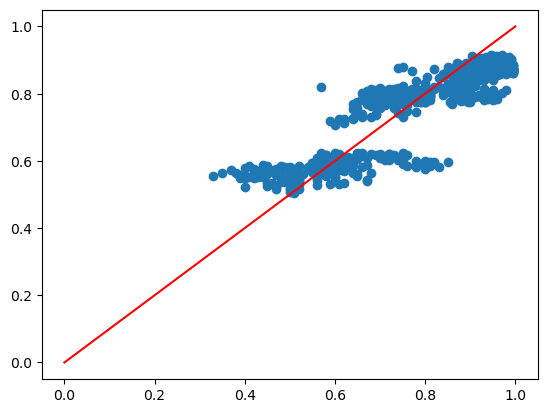

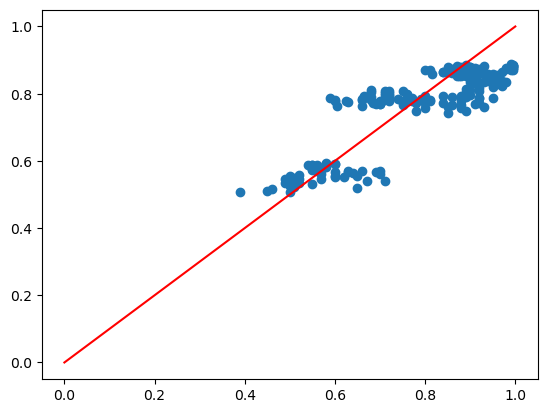

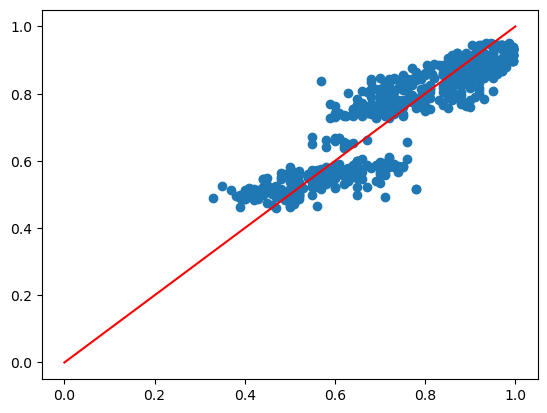

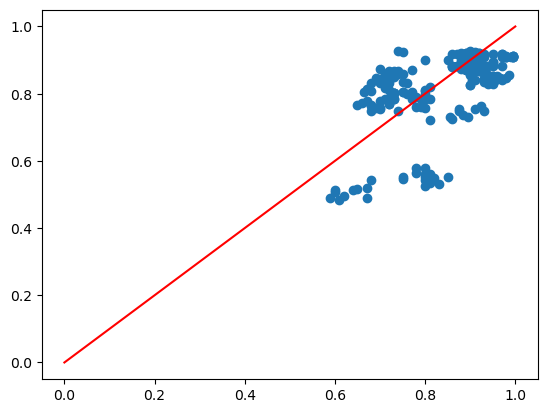

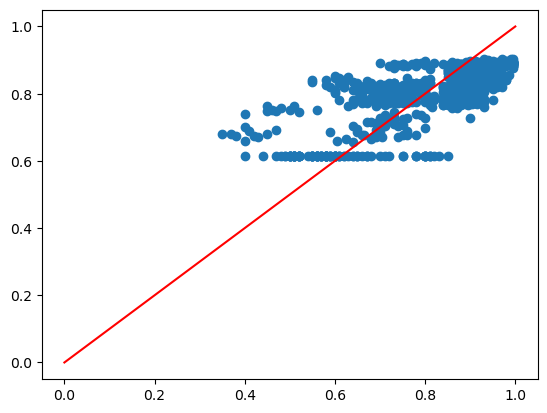

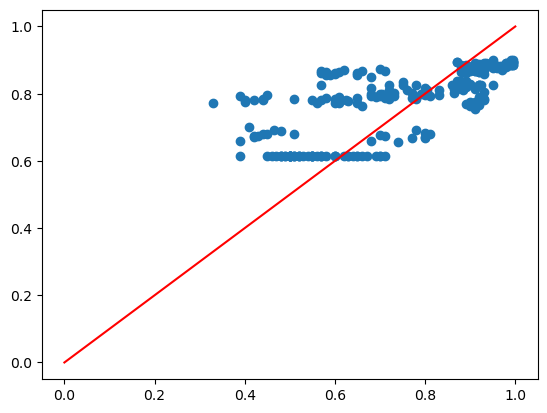

In [5]:
import numpy as np
train_losses = []
validation_losses = []
train_MAEs=[]
test_MAEs=[]
device = torch.device('cuda')
for lr in LEARNING_RATE:
    for drop in DROP_OUT:
        for num_layer in NUM_LAYERS:
            train_loss = 0
            test_loss = 0
            train_MAE = 0
            test_MAE = 0
            NUM_RUN = 3
            for i in range(NUM_RUN):
                print("Run " + str(i + 1))
                train_data, val_data = a.sample_test_data_catalyst_only(10,2,2)
                train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
                val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

                device = torch.device('cuda')
                model = GNNModel(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, GLOB_VEC_SIZE, num_layers=num_layer, dp_rate=drop)
                print("lr={0},drop={1},num_layer={2}".format(lr,drop,num_layer))
                optimizer = torch.optim.Adam(model.parameters(), lr=lr)
                scheduler = ExponentialLR(optimizer, gamma=0.95)
                t = Trainer(model, device, optimizer, scheduler, glob_v= True)
                results = t.train(train_loader, val_loader, nn.BCELoss, EPOCHS)
                train_loss += np.array(t.log["train_loss"])
                test_loss += np.array(t.log["val_loss"])
                train_MAE += results[1]
                test_MAE += results[4]
            train_loss /= NUM_RUN
            test_loss /= NUM_RUN
            train_MAE /= NUM_RUN
            test_MAE /= NUM_RUN

            train_losses.append(train_loss)
            validation_losses.append(test_loss)
            train_MAEs.append(train_MAE)
            test_MAEs.append(test_MAE)
print(train_losses[0])
print(train_losses)

        

In [17]:
print(train_losses[0])
# print(train_losses)
print(len(train_losses))

[0.51610583 0.50400287 0.5024002  0.50179636 0.49970117 0.49943113
 0.49805617 0.49621797 0.49516067 0.4940566  0.4929467  0.49180934
 0.491045   0.49014533 0.48815966 0.48669735 0.48544118 0.4849256
 0.48102024 0.47964326 0.47812724 0.4759873  0.47429475 0.47300056
 0.46820712 0.46655318 0.46618545 0.4642332  0.46348763 0.46451536
 0.46331    0.46331713 0.46245643 0.46021712 0.4602624  0.46733204
 0.45967245 0.46177253 0.4582695  0.45907077 0.45626783 0.45721236
 0.45635036 0.45606914 0.4564509  0.45464373 0.45360482 0.4539282
 0.4533384  0.45468625]
12


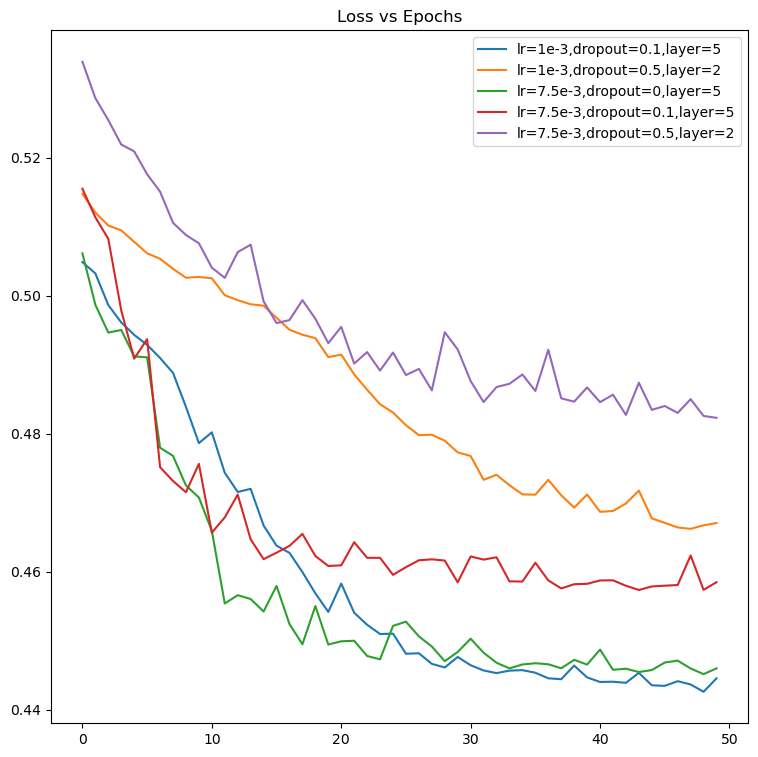

In [61]:
x = list(range(EPOCHS))
plt.figure(figsize=(9,9))
plt.title("Loss vs Epochs")
#plt.plot(x,train_losses[0], label="lr=1e-3,dropout=0,layer=2")
#plt.plot(x,train_losses[1], label="lr=1e-3,dropout=0,layer=5")
#plt.plot(x,train_losses[2], label="lr=1e-3,dropout=0.1,layer=2")
plt.plot(x,train_losses[3], label="lr=1e-3,dropout=0.1,layer=5")
plt.plot(x,train_losses[4], label="lr=1e-3,dropout=0.5,layer=2")
#plt.plot(x,train_losses[5], label="lr=1e-3,dropout=0.5,layer=5")
#plt.plot(x,train_losses[6], label="lr=7.5e-3,dropout=0,layer=2")
plt.plot(x,train_losses[7], label="lr=7.5e-3,dropout=0,layer=5")
#plt.plot(x,train_losses[8], label="lr=7.5e-3,dropout=0.1,layer=2")
plt.plot(x,train_losses[9], label="lr=7.5e-3,dropout=0.1,layer=5")
plt.plot(x,train_losses[10], label="lr=7.5e-3,dropout=0.5,layer=2")
#plt.plot(x,train_losses[11], label="lr=7.5e-3,dropout=0.5,layer=5")
plt.legend()

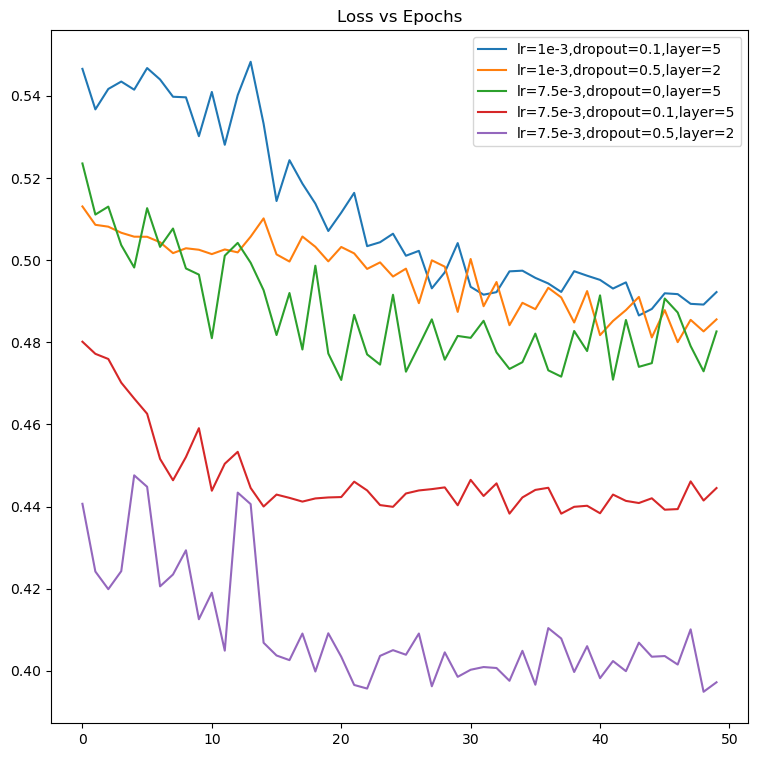

In [62]:
x = list(range(EPOCHS))
plt.figure(figsize=(9, 9))
plt.title("Loss vs Epochs")
#plt.plot(x,validation_losses[0], label="lr=1e-3,dropout=0,layer=2")
#plt.plot(x,validation_losses[1], label="lr=1e-3,dropout=0,layer=5")
#plt.plot(x,validation_losses[2], label="lr=1e-3,dropout=0.1,layer=2")
plt.plot(x,validation_losses[3], label="lr=1e-3,dropout=0.1,layer=5")
plt.plot(x,validation_losses[4], label="lr=1e-3,dropout=0.5,layer=2")
#plt.plot(x,validation_losses[5], label="lr=1e-3,dropout=0.5,layer=5")
#plt.plot(x,validation_losses[6], label="lr=7.5e-3,dropout=0,layer=2")
plt.plot(x,validation_losses[7], label="lr=7.5e-3,dropout=0,layer=5")
#plt.plot(x,validation_losses[8], label="lr=7.5e-3,dropout=0.1,layer=2")
plt.plot(x,validation_losses[9], label="lr=7.5e-3,dropout=0.1,layer=5")
plt.plot(x,validation_losses[10], label="lr=7.5e-3,dropout=0.5,layer=2")
#plt.plot(x,validation_losses[11], label="lr=7.5e-3,dropout=0.5,layer=5")
plt.legend()

In [63]:
print(train_MAEs)
print(test_MAEs)

[0.05765233437220255, 0.04030117020010948, 0.05071818580230077, 0.0455503004292647, 0.06791027635335922, 0.05638810868064562, 0.04138840362429619, 0.03575805823008219, 0.042360249906778336, 0.04117236907283465, 0.060605195661385856, 0.06255848209063213]
[0.07932694007953008, 0.07043537000815074, 0.06710608427723248, 0.059016807625691094, 0.10170179605484009, 0.09022558232148488, 0.07868972917397817, 0.06561511754989624, 0.07633777459462483, 0.06351147095362346, 0.06694230809807777, 0.08107385536034901]


In [64]:
import pandas as pd
data1 = {"LEARNING_RATE": [1e-3,1e-3,1e-3,1e-3,1e-3,1e-3,7.5e-3,7.5e-3,7.5e-3,7.5e-3,7.5e-3,7.5e-3],"DROP_OUT":[0,0,0.1,0.1,0.5,0.5,0,0,0.1,0.1,0.5,0.5],"NUM_LAYER":[2,5,2,5,2,5,2,5,2,5,2,5],"Train_MAE":train_MAEs}
data2 = {"LEARNING_RATE": [1e-3,1e-3,1e-3,1e-3,1e-3,1e-3,7.5e-3,7.5e-3,7.5e-3,7.5e-3,7.5e-3,7.5e-3],"DROP_OUT":[0,0,0.1,0.1,0.5,0.5,0,0,0.1,0.1,0.5,0.5],"NUM_LAYER":[2,5,2,5,2,5,2,5,2,5,2,5],"Test_MAE":test_MAEs}
frame1 = pd.DataFrame(data1,index=range(1,13))
frame2 = pd.DataFrame(data2,index=range(1,13))


In [65]:
frame1.to_csv('Train_MAE.csv')
frame2.to_csv('Test_MAE.csv')